In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

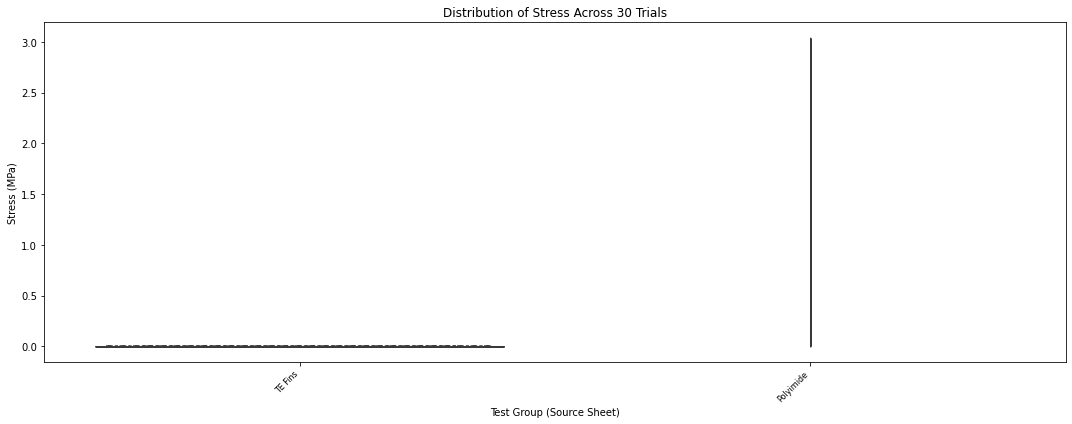

In [2]:
# Combined Data in One Graph

file_path = 'Combined mUTM Data.xlsx'
Sheet_const = {
    'TE Fins':{'A0': 40500, 'L0': 150},
    'Polyimide':{'A0': 36, 'L0': 12},
    '12.5% PVA':{'A0': 15.6913, 'L0':14.01},
    '10% PVA': {'A0': 15.6913, 'L0':14.01}
}

all_sheets = pd.read_excel(file_path, sheet_name = None)
   
all_data_combined = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    df = df.copy()
    const = Sheet_const[sheet_name]
    df['Test_Source'] = sheet_name
    df['Stress_MPa'] = df['Force_N'] / const['A0']
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)

plt.figure(figsize=(15,6))

sns.violinplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, palette="viridis", inner="quartile", cut=0)
plt.title('Distribution of Stress Across 30 Trials')
plt.xlabel('Test Group (Source Sheet)')
plt.ylabel('Stress (MPa)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

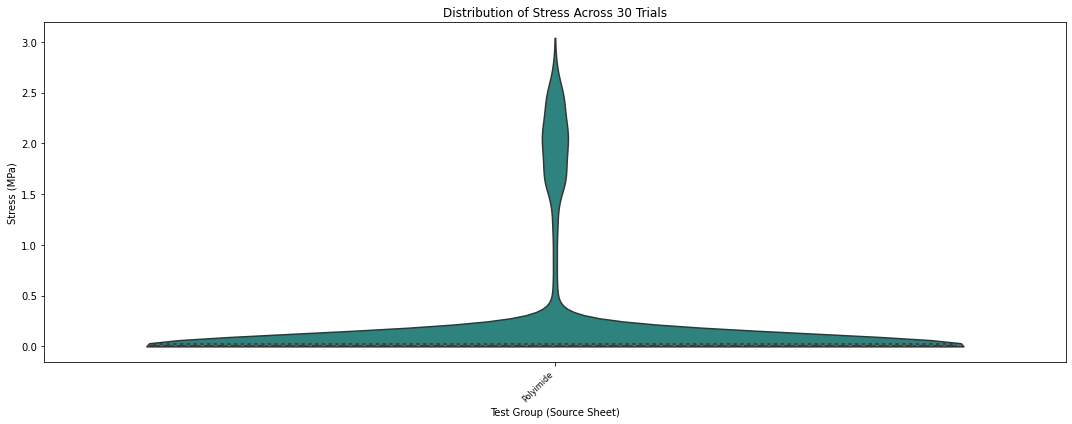

In [3]:
# Individual Graph - Polyimide

file_path = 'Combined mUTM Data.xlsx'

A0 = 36
L0 = 12

all_sheets = pd.read_excel(file_path, sheet_name = None)

   
all_data_combined = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    df = df.copy()
    df['Test_Source'] = 'Polyimide'
    df['Stress_MPa'] = df['Force_N']/A0
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)



plt.figure(figsize=(15,6))

sns.violinplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, palette="viridis", inner="quartile", cut=0)
plt.title('Distribution of Stress Across 30 Trials')
plt.xlabel('Test Group (Source Sheet)')
plt.ylabel('Stress (MPa)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

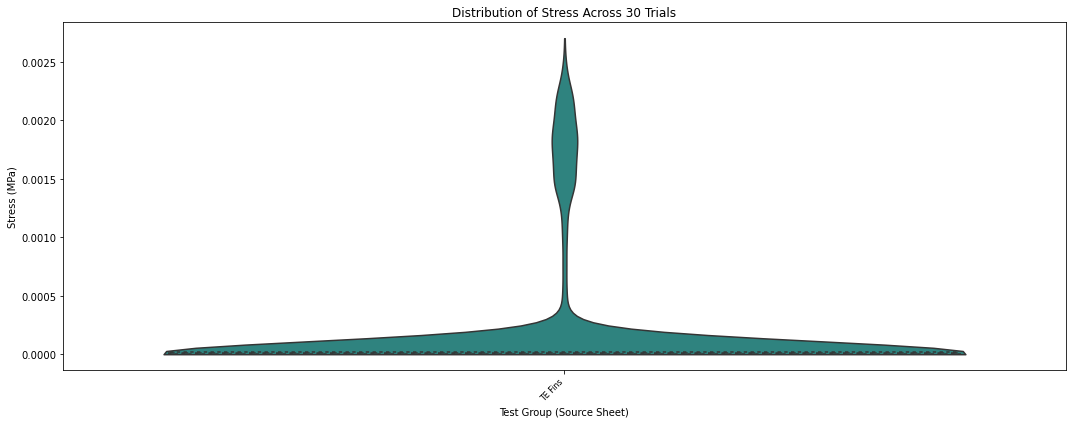

In [4]:
# Individual Graph - TE Fins

file_path = 'Combined mUTM Data.xlsx'

A0 = 40500
L0 = 150

all_sheets = pd.read_excel(file_path, sheet_name = None)

   
all_data_combined = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    df = df.copy()
    df['Test_Source'] = 'TE Fins'
    df['Stress_MPa'] = df['Force_N']/A0
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)



plt.figure(figsize=(15,6))

sns.violinplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, palette="viridis", inner="quartile", cut=0)
plt.title('Distribution of Stress Across 30 Trials')
plt.xlabel('Test Group (Source Sheet)')
plt.ylabel('Stress (MPa)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()